In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('medical-charges.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Now Bascially We will perform Exploratory Analysis based on the data set to Figure out the dataset using some visualization.

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## Starting with AGE Coloumn

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(medical_df, x='age',marginal='box',nbins=47, title="Dist of Age")
fig.update_layout(bargap = 0.1)
fig.show()

### Body Mass Index


In [10]:
fig =  px.histogram(medical_df,title="BMI Dist",x="bmi",color_discrete_sequence=['red'],marginal='box')
fig.update_layout(bargap = 0.1)
fig.show()

### Dist of Charges

In [11]:
fig = px.histogram(medical_df, x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title="Anual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df, x='charges',marginal='box',color='sex',color_discrete_sequence=['red','green'],title="Anual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df, x='charges',marginal='box',color='region',title="Anual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [14]:
px.histogram(medical_df,x='smoker',color='sex',title='smoker')

In [15]:
fig = px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title="Age VS Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [16]:
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title="BMI VS Charges")
fig.update_traces(marker_size = 5)
fig.show()

### Computing Correlation between columns

In [17]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [18]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

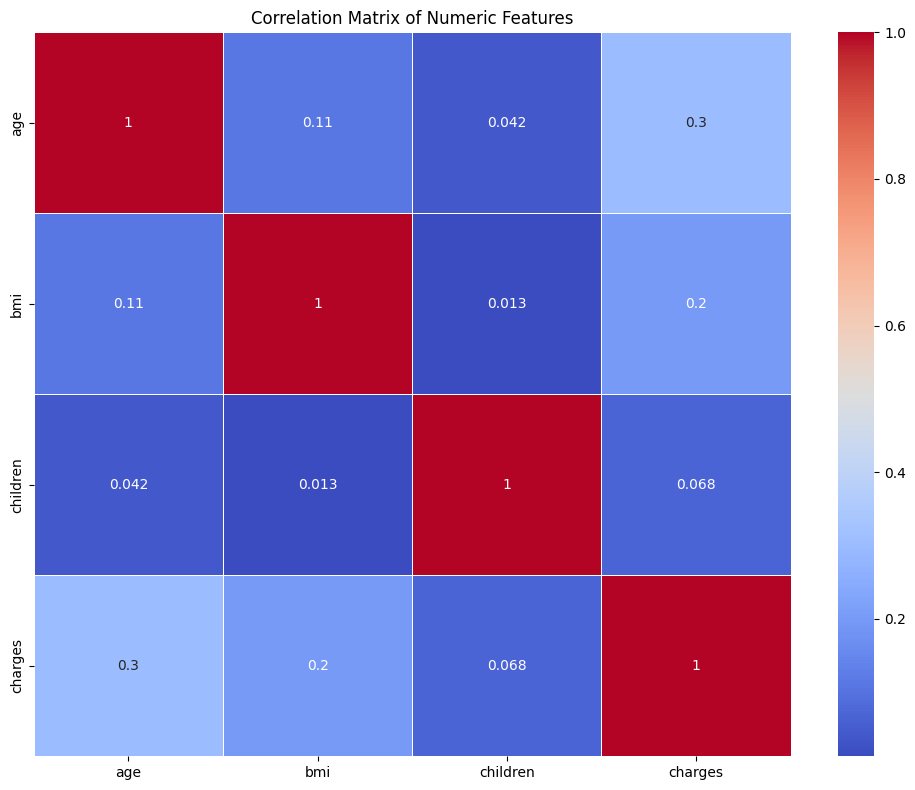

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [19]:
# Create a copy of the dataframe with only numeric columns for correlation
numeric_df = medical_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Display the correlation matrix
correlation_matrix


In [20]:
def estimate_charge(age, w, b):
    return w * age + b

In [21]:
w = 50
b = 100

In [22]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

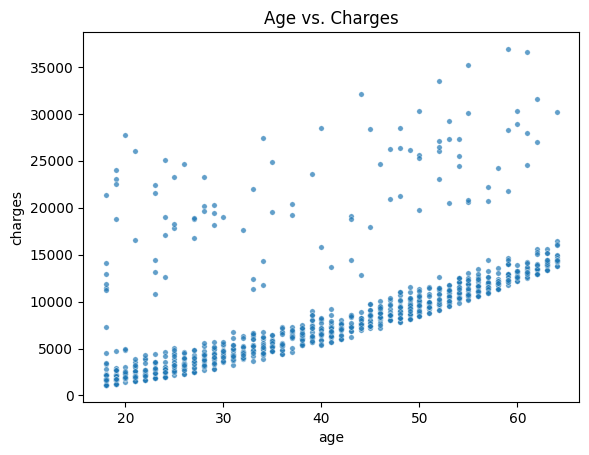

In [23]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [24]:
ages = non_smoker_df.age

In [25]:
estimated_charges = estimate_charge(ages,w,b)

In [26]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

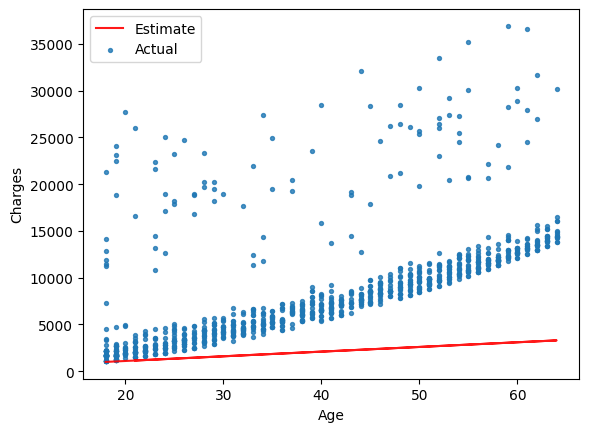

In [27]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [28]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charge(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

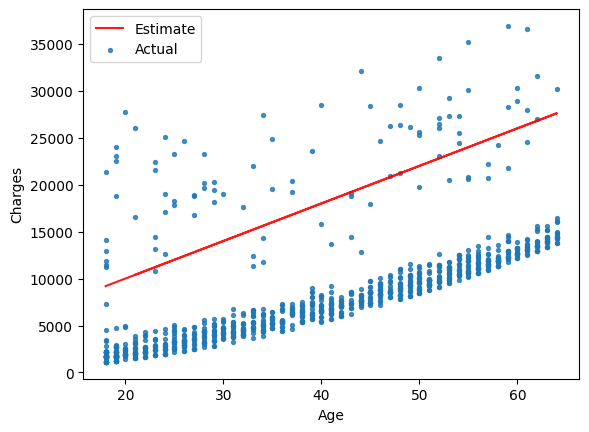

In [29]:
try_parameters(400,2000)

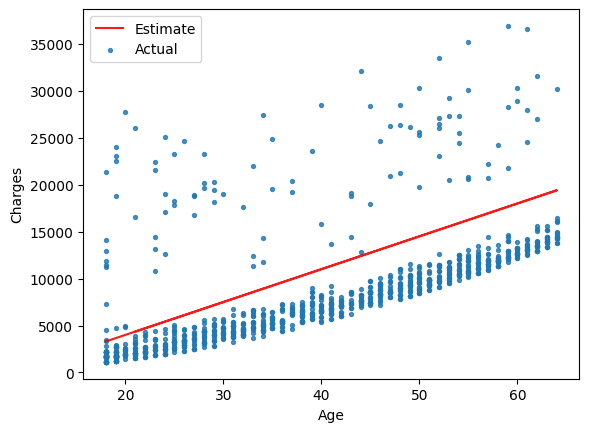

In [30]:
try_parameters(350,-3000)

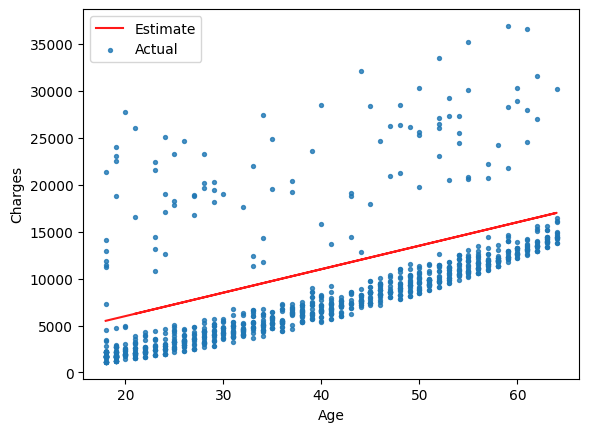

In [31]:
try_parameters(250,1000)

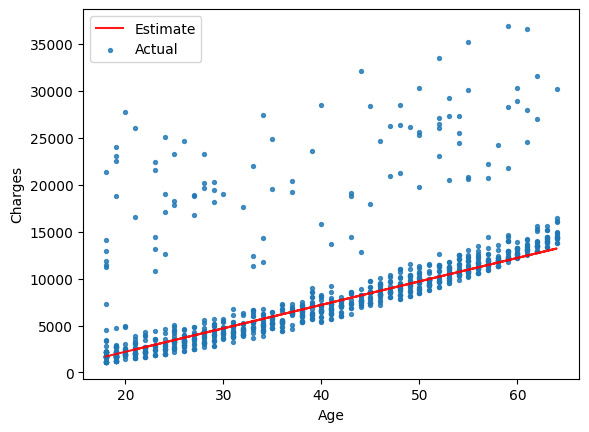

In [32]:
try_parameters(250,-2800)

# RMSE - Root Mean Squared Error

In [33]:
import numpy as np

In [34]:
def rmse(targets,pred):
    return np.sqrt(np.mean(np.square(targets - pred)))

In [35]:
rmse(targets=target,pred=estimated_charges)

np.float64(8461.949562575493)

### We have to reduce this as much as possible to make our model accurate

In [36]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charge(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4663.743689821927


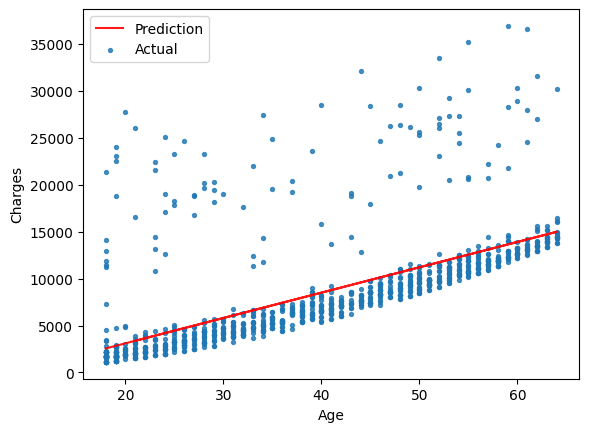

In [37]:
try_parameters(270, -2300)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
X = non_smoker_df[['age']]
y = non_smoker_df.charges

In [40]:
X.shape #Model.fit requires two dimension input 

(1064, 1)

In [41]:
target.shape

(1064,)

In [42]:
model.fit(X,y)

LinearRegression()

In [43]:
model.predict(np.array([[23],[37],[61]]))

g:\Shubham\Machine Learning\Projects\MEXPENSE---AI-Medical-Expense-Calculator\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [44]:
prediction = model.predict(X)
rmse(target,prediction)







np.float64(4662.505766636395)

In [45]:
from sklearn.linear_model import SGDRegressor
new_model = SGDRegressor()

In [46]:
new_model.fit(X,y,)

SGDRegressor()

In [47]:
new_pred = new_model.predict(X)
rmse(target,new_pred)

np.float64(4941.720862187597)

In [48]:
smoker_df = medical_df[medical_df.smoker == 'yes']

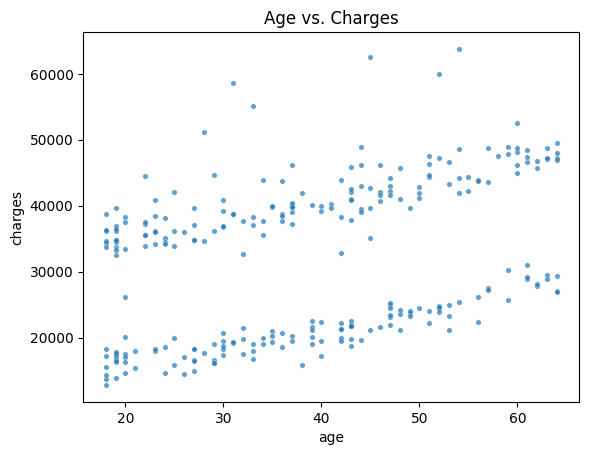

In [49]:
plt.title('Age vs. Charges')
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15);

### Now training with multiple inputs 

In [50]:
inputs = medical_df[['age','bmi','children']]
targets = medical_df['charges']

In [51]:
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
rmse(pred=predictions,targets=targets)


np.float64(11355.317901125973)

#### Making use of Categorical Data 

In [52]:
smoker_codes = {'no' : 0, 'yes' : 1}
medical_df['smoker_codes'] = medical_df.smoker.map(smoker_codes)

In [53]:
medical_df.charges.corr(medical_df.smoker_codes)

np.float64(0.7872514304984778)

In [54]:
#Now taking this also in the account as well while creating the model -

In [55]:
inputs = medical_df[['age','bmi','children','smoker_codes']]
targets = medical_df['charges']

In [56]:
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(pred=predictions,targets=targets)
loss

np.float64(6056.439217188081)

In [57]:
#Now also one more column we have - Sex column
sex_codes = {'male' : 1, 'female' : 0}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [58]:
inputs = medical_df[['age','bmi','children','smoker_codes','sex_code']]
targets = medical_df['charges']

In [59]:
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(pred=predictions,targets=targets)
loss

np.float64(6056.100708754546)

### Now for region column we are using one hot encoder

In [60]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [61]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [62]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [63]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


#### Now we will insert into the regression model

In [64]:
inputs = medical_df[['age','bmi','children','smoker_codes','sex_code','northeast','northwest','southeast','southeast']]
targets = medical_df['charges']

In [65]:
model = LinearRegression().fit(inputs,targets)

In [66]:
predictions = model.predict(inputs)

In [67]:
loss = rmse(targets=targets,pred=predictions)
loss

np.float64(6041.679651174452)

In [68]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   960.0509913 ,   607.08709188,   -37.48552904,
         -37.48552904])

#### For model improvement we can follow certain measure

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
numeric_col = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_col])

StandardScaler()

In [71]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [72]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [73]:
scaled_inputs = scaler.transform(medical_df[numeric_col])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [77]:
cat_cols = ['smoker_codes', 'sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values


In [82]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets = medical_df.charges

In [83]:
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
loss

np.float64(6041.679651174452)

In [84]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.1)

In [87]:
model = LinearRegression().fit(X_train,y_train)

In [88]:
predictions_test = model.predict(X_test)

In [89]:
loss = rmse(y_test,predictions_test)
loss

np.float64(5501.096081547829)